# Основы Numpy

## Интро
### Зачем нам вообще Numpy?

In [1]:
import numpy as np

In [2]:
# сделаем две матрицы 300х300
n = 300
A = np.random.rand(n, n)
B = np.random.rand(n, n)

А теперь попробуем провести матричное умножение.

In [3]:
%%time
C = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        for k in range(n):
            C[i, j] += A[i, k] * B[k, j]

CPU times: total: 21.8 s
Wall time: 22.2 s


In [4]:
%%time
C = A @ B

CPU times: total: 0 ns
Wall time: 50 ms


Нумпай быстрее циклов питона во много раз!

Wall time: 50 ms — это реальное время, которое прошло от старта до финиша ячейки. Это самое важное для нас число.

total: 0 ns  означает, что сама вычислительная задача была настолько быстрой, что таймер её даже не засёк (сколько процессор реально работал)

### Array

numpy.array (или ndarray) — это объект, представляющий собой многомерный, гомогенный массив данных, хранящийся в непрерывном (contiguous) блоке памяти.Гомогенный: Все элементы массива должны иметь один и тот же тип данных (int32, float64 и т.д.). Это позволяет NumPy выполнять операции без проверки типа для каждого элемента, что критически важно для скорости.

- Непрерывный блок памяти: В отличие от стандартного списка Python, который является массивом указателей на разрозненные в памяти объекты PyObject, numpy.array хранит все свои данные в одном цельном "куске" оперативной памяти. Это позволяет:
- Векторизовать вычисления: Использовать специальные процессорные инструкции (SIMD), которые применяют одну операцию сразу к несколььким элементам данных.
- Минимизировать оверхед: Доступ к элементам происходит через простую арифметику смещений от начального адреса, а не через разыменование указателей.

Как работать с numpy? Создаем numpy.array

In [5]:
x1 = [1, 2, 3]
x2 = (1, 2, 3)
x3 = {1, 2, 3} # множество (set)
x4 = 'привет'
x5 = 2.5
x6 = 1
x7 = {'1': 1, '2': 2}
x = [x1, x2, x3, x4, x5, x6, x7]

In [6]:
for obj in x:
    print(np.array(obj))

[1 2 3]
[1 2 3]
{1, 2, 3}
привет
2.5
1
{'1': 1, '2': 2}


In [7]:
np.array(x1)

array([1, 2, 3])

In [8]:
np.array(x2)

array([1, 2, 3])

In [9]:
np.array(x3)  # не делайте так

array({1, 2, 3}, dtype=object)

In [10]:
np.array(x3)[0]  # вот почему

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

Это неупорядоченная коллекция по своей спецификации в Python. numpy.array же является упорядоченной, индексируемой структурой. Попытка создать массив из set приводит к неопределенному поведению, так как порядок элементов не гарантирован. NumPy не может построить детерминированную структуру из недетерминированного источника.

In [11]:
np.array(x4)

array('привет', dtype='<U6')

In [12]:
np.array(x5)

array(2.5)

In [13]:
np.array(x6)

array(1)

In [14]:
np.array(x7)

array({'1': 1, '2': 2}, dtype=object)

Всегда можно преобразовать в numpy array? Нет!

Нужно, чтобы все элементы были одинакового размера и типа (с учетом каста).

In [15]:
x = [[1, 2, 3], [1, 2]]  # разная размерность
np.array(x)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

 NumPy спроектирован для работы с прямоугольными (N-мерными) структурами данных. Когда вы передаете [[1, 2, 3], [1, 2]], эта структура не является прямоугольной. NumPy не может вывести общую форму (shape), например (2, 3).
В этом случае NumPy идет по пути наименьшего сопротивления: он создает одномерный массив с dtype=object. Элементами такого массива являются не числа, а указатели на исходные объекты-списки Python. Это полностью лишает вас всех преимуществ NumPy: данные не хранятся непрерывно, и векторизация невозможна.

In [16]:
x = [[1, 2, 3], [1, 2, 3]]
np.array(x)

array([[1, 2, 3],
       [1, 2, 3]])

In [17]:
x = [[1, 2, 3.5], [1, 2, 3]]
np.array(x)

array([[1. , 2. , 3.5],
       [1. , 2. , 3. ]])

In [18]:
x = [[1, '2', 3.5], [1, 2, 3]]
np.array(x)

array([['1', '2', '3.5'],
       ['1', '2', '3']], dtype='<U32')

**Подсказка:** string > float > int

Иерархия строится по принципу "вместимости":

- int -> float: int (например, 5) можно без потерь представить как float (5.0). Обратное неверно (5.5 нельзя без потерь представить как int). Следовательно, float является "старшим" типом.
- float -> string: Любое число можно без потерь представить как строку (например, 5.5 как '5.5'). Обратное неверно (строку 'привет' нельзя представить как float). Следовательно, string является самым "старшим" типом.

NumPy следует этой логике: если в данных есть хотя бы один float, весь массив будет float. Если есть хотя бы одна string, весь массив будет string.


### Специальные массивы

In [19]:
np.identity(5)  # диагональная матрица

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [20]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [21]:
np.ones((5, 6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [22]:
np.eye(3, 4) # создает двумерный массив (матрицу) размера N x M с единицами на главной диагонали и нулями в остальных позициях.

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [23]:
a = np.zeros((3, 2))
b = np.zeros_like(a) # матрица по образцу 
b

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

Также специальные матрицы доступны из модулей нумпай

In [24]:
np.random  # module

<module 'numpy.random' from 'D:\\setup\\anaconda\\Lib\\site-packages\\numpy\\random\\__init__.py'>

In [25]:
dir(np.random) # содержит функции и классы для генерации псевдослучайных чисел.

['BitGenerator',
 'Generator',
 'MT19937',
 'PCG64',
 'PCG64DXSM',
 'Philox',
 'RandomState',
 'SFC64',
 'SeedSequence',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bounded_integers',
 '_common',
 '_generator',
 '_mt19937',
 '_pcg64',
 '_philox',
 '_pickle',
 '_sfc64',
 'beta',
 'binomial',
 'bit_generator',
 'bytes',
 'chisquare',
 'choice',
 'default_rng',
 'dirichlet',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_bit_generator',
 'get_state',
 'gumbel',
 'hypergeometric',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_bit_generator',
 'set_state',
 'shuf

In [26]:
np.random.rand(2, 3)  # uniform distribution

array([[0.65076256, 0.05610177, 0.94563639],
       [0.27558751, 0.38309222, 0.69134571]])

In [27]:
np.random.randint(0, 10, (3, 4))  # random integers

array([[0, 8, 8, 6],
       [6, 4, 7, 6],
       [2, 9, 7, 1]])

Как всегда получать одинаковую случайную матрицу?

np.random.seed() инициализирует генератор псевдослучайных чисел (Pseudo-Random Number Generator, PRNG).

PRNG — это детерминированный алгоритм, который генерирует последовательность чисел, имитирующую свойства случайной. Он работает по принципу: новое_число = f(текущее_состояние).

- Состояние (state): Это внутреннее, обычно очень большое число, которое хранит генератор.
seed (зерно, начальное значение): Это значение, которое устанавливает начальное состояние генератора.

Когда вы вызываете np.random.seed(42), вы принудительно устанавливаете внутреннее состояние PRNG в определенное значение, производное от числа 42. После этого каждый последующий вызов случайной функции (np.random.rand(), etc.) будет сдвигать это состояние предсказуемым образом, генерируя одну и ту же последовательность чисел.
Это обеспечивает воспроизводимость экспериментов, что является фундаментальным требованием в науке и машинном обучении.

In [28]:
np.random.seed(42)  # фиксируем ПОРЯДОК случайностей

In [29]:
np.random.seed(42)
np.random.rand(2, 3)

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452]])

In [30]:
np.random.seed(42)
np.random.rand(2, 3)

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452]])

In [31]:
np.random.seed(123)
x1 = np.random.rand(2, 3)
np.random.seed(123)
x2 = np.random.rand(2, 3)
x1 == x2

array([[ True,  True,  True],
       [ True,  True,  True]])

In [32]:
np.random.seed(123)
x1 = np.random.rand(2, 3)  # first random
x2 = np.random.rand(2, 3)  # second random
x1 == x2

array([[False, False, False],
       [False, False, False]])

In [33]:
np.random.seed(123)
x1 = np.random.rand(2, 3)
x2 = np.random.rand(2, 3)

np.random.seed(123)
x3 = np.random.rand(2, 3)
x4 = np.random.rand(2, 3)

In [34]:
x1 == x3

array([[ True,  True,  True],
       [ True,  True,  True]])

In [35]:
x2 == x4

array([[ True,  True,  True],
       [ True,  True,  True]])

In [36]:
x1 == x4

array([[False, False, False],
       [False, False, False]])

### Специальные массивы из последовательностей

In [37]:
np.linspace(0, 100, 10)  # take 10 equal parts from [0, 100]

array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])

In [38]:
np.linspace(0, 99, num=11)

array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ])

In [39]:
np.linspace(0, 99, num=11, dtype=int)  # явно укажем, что нужны целые числа

array([ 0,  9, 19, 29, 39, 49, 59, 69, 79, 89, 99])

In [40]:
np.linspace(0, 99, num=11, dtype=int, endpoint=False) #учитываем ли конечную точку endpoint

array([ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81, 90])

In [41]:
np.logspace(1, 3, 5, base=10) # начало/конец/кол-во шагов/основание

# возводим 10 в стемени между 1 и 3 на 5 равных частей

array([  10.        ,   31.6227766 ,  100.        ,  316.22776602,
       1000.        ])

In [42]:
np.logspace(1, 3, 5, base=2)

array([2.        , 2.82842712, 4.        , 5.65685425, 8.        ])

In [43]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
np.arange(1, 100, 7)  # [начало:конец:шаг]

array([ 1,  8, 15, 22, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 99])

### Сравнение по скорости и памяти

#### Скорость (время на выполнение операции)

%%timeit — это "магическая" команда IPython/Jupyter для микро-бенчмаркинга или профилирования производительности кода.

Он работает так, чтобы получить статистически значимый результат:

- Циклы (loops): Он запускает ваш код в цикле (100,000 раз в примере), чтобы общее время выполнения стало достаточно большим для точного измерения.
- Повторы (runs): Он повторяет эту процедуру несколько раз (7 раз в примере), чтобы нивелировать влияние случайных флуктуаций в производительности системы (например, фоновых процессов).

In [45]:
%%timeit
x1 = [i**2 for i in range(1000)]

62.1 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [46]:
%%timeit
x2 = np.arange(1000)**2

2.74 µs ± 95.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


- 2.74 µs per loop (mean): Среднее арифметическое время выполнения одного цикла, посчитанное по всем запускам. Это главный результат.
- ± 95.1 ns (std. dev.): Стандартное отклонение. Показывает, насколько сильно варьировалось время выполнения между запусками. Низкое значение говорит о стабильной производительности.
- of 7 runs, 100,000 loops each: Параметры самого эксперимента. timeit автоматически подбирает количество циклов и повторов, чтобы измерение заняло разумное время

#### Память

sys.getsizeof(object) возвращает размер объекта в байтах, который он занимает непосредственно в памяти

In [47]:
import sys

In [48]:
x1 = [i**2 for i in range(1000)]
sys.getsizeof(x1)

8856

In [49]:
x2 = np.arange(1000)**2
sys.getsizeof(x2)

4112

### Функции и атрибуты

#### Типы и кастинг

In [50]:
x = [[1, 2, 3], [1, 2, 3]]
x = np.array(x)
x

array([[1, 2, 3],
       [1, 2, 3]])

In [51]:
x.dtype  # тип всех элементов

dtype('int32')

In [52]:
x = [[1, 2, 3.5], [1, 2, 3]]
x = np.array(x)
x

array([[1. , 2. , 3.5],
       [1. , 2. , 3. ]])

In [53]:
x.dtype  # тип всех элементов

dtype('float64')

In [54]:
x = [[1, '2', 3.5], [1, 2, 3]]
x = np.array(x)
x

array([['1', '2', '3.5'],
       ['1', '2', '3']], dtype='<U32')

In [55]:
x.dtype  # тип всех элементов

dtype('<U32')

In [56]:
x[0][0]

'1'

In [57]:
x[0][0].dtype

dtype('<U1')

#### Shape и reshape

In [58]:
x = np.arange(1, 21)  # 1d array
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [59]:
x.shape  # 20 строк

(20,)

In [60]:
x.ndim  #  количество измерений (осей) массива x, только одна размерность == 1d array

1

In [61]:
x = x.reshape((2, 10))  # меняем размерность, теперь 2 строки и 10 столбцов
x

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])

In [62]:
x.shape

(2, 10)

In [63]:
x.ndim

2

In [64]:
x.reshape((-1,))  # а теперь вернем все назад, "вытянем" в вектор

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [65]:
x = x.reshape((-1,))  # не забываем присвоить значение

In [66]:
x.reshape((2, -1))  # вдруг вы не знаеете, сколько колонок должно быть

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])

In [67]:
x.reshape((2, 5, 2))  # можно и 3d array сделать

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10]],

       [[11, 12],
        [13, 14],
        [15, 16],
        [17, 18],
        [19, 20]]])

In [68]:
x.reshape((2, 5, 2)).shape, x.reshape((2, 5, 2)).ndim

((2, 5, 2), 3)

In [69]:
x.reshape((2, -1, -1))  # только один раз можно поставить "-1"

ValueError: can only specify one unknown dimension

In [70]:
# разменрость массивов
x.reshape((2, 5, 2)).shape, x.reshape(2, 10).shape, x.shape

((2, 5, 2), (2, 10), (20,))

#### Задача 2

Имеющийся двумерный список X нужно сделать (1) одномерным, (2) трехмерным

In [71]:
lst = [[1, 2, 3], [2, 3, 4], [3, 4, 5]]
lst

[[1, 2, 3], [2, 3, 4], [3, 4, 5]]

In [72]:
[elem for pack in lst for elem in pack]

[1, 2, 3, 2, 3, 4, 3, 4, 5]

In [73]:
%%timeit
[elem for pack in lst for elem in pack]  # сложно, долго, неуниверсально

519 ns ± 24.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [74]:
np.array(lst).reshape((-1,))

array([1, 2, 3, 2, 3, 4, 3, 4, 5])

In [75]:
%%timeit
np.array(lst).reshape((-1,))

1.62 µs ± 43.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [76]:
lst_new = np.array(lst)

In [77]:
%%timeit
lst_new.reshape((-1,))

243 ns ± 4.96 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


#### Функции и методы

In [78]:
x = np.arange(1, 21)
x = x.reshape((5, 4))
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [79]:
x.mean()  # среднее массива

10.5

- (axis=0): операция по по строкам, получая результат для каждого столбца. Ось 0 исчезает.
- (axis=1): операция по столбцам, получая результат для каждой строки. Ось 1 исчезает.

In [80]:
x.mean(axis=0)  # среднее по размерностям (столбцы)

array([ 9., 10., 11., 12.])

In [81]:
x.mean(axis=1)  # среднее по строкам

array([ 2.5,  6.5, 10.5, 14.5, 18.5])

In [82]:
x.mean(axis=2)  # а нету 3 размерности, их всего 2 штуки

AxisError: axis 2 is out of bounds for array of dimension 2

In [83]:
np.mean(x) == x.mean()  # функции numpy дают тот же результат, что и методы

True

In [84]:
np.mean([1, 2, 3])  # но функциям можно давать не только numpy.array на вход

2.0

In [85]:
np.std(x, axis=1)

array([1.11803399, 1.11803399, 1.11803399, 1.11803399, 1.11803399])

In [86]:
np.median(x, axis=0)

array([ 9., 10., 11., 12.])

In [87]:
np.linalg.norm(x) # Функция np.linalg.norm(x) вычисляет норму (длину, "размер") вектора или матрицы x в линейной алгебре.

53.5723809439155

In [88]:
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [89]:
x.transpose() # транспонирвоание матрицы

array([[ 1,  5,  9, 13, 17],
       [ 2,  6, 10, 14, 18],
       [ 3,  7, 11, 15, 19],
       [ 4,  8, 12, 16, 20]])

In [90]:
x.T

array([[ 1,  5,  9, 13, 17],
       [ 2,  6, 10, 14, 18],
       [ 3,  7, 11, 15, 19],
       [ 4,  8, 12, 16, 20]])

In [91]:
x.T == x.transpose()

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [92]:
x = np.random.rand(5, 5)  # квадратная матрица
x

array([[0.43857224, 0.0596779 , 0.39804426, 0.73799541, 0.18249173],
       [0.17545176, 0.53155137, 0.53182759, 0.63440096, 0.84943179],
       [0.72445532, 0.61102351, 0.72244338, 0.32295891, 0.36178866],
       [0.22826323, 0.29371405, 0.63097612, 0.09210494, 0.43370117],
       [0.43086276, 0.4936851 , 0.42583029, 0.31226122, 0.42635131]])

In [93]:
np.linalg.det(x) # Функция np.linalg.det(x) вычисляет определитель (детерминант) квадратной матрицы x.

0.005529177094692621

In [94]:
b = np.array([1, 2, 7, 4, 5])

In [95]:
np.linalg.solve(x, b)  # решить, как систему линейных уравнений Ax=b

array([ 20.50625459,  -9.47885566,  -5.97272384, -10.75618172,
        15.82332068])

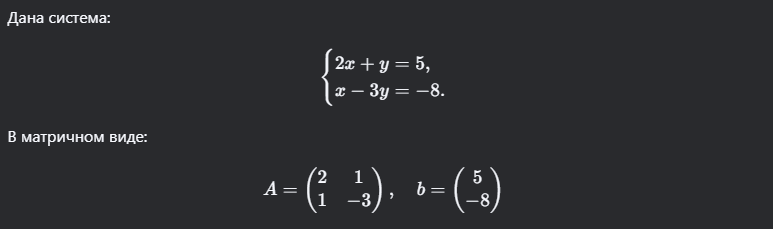

In [96]:
import numpy as np

A = np.array([[2, 1], [1, -3]])
b = np.array([5, -8])
x = np.linalg.solve(A, b)

print(x)  # [1. 3.]  → x=1, y=3

[1. 3.]


In [97]:
print(A @ x)  # [5., -8.] (совпадает с b)

[ 5. -8.]


### Операции

In [98]:
x = np.random.rand(5)
y = np.random.rand(5)

In [99]:
x

array([0.89338916, 0.94416002, 0.50183668, 0.62395295, 0.1156184 ])

In [100]:
y

array([0.31728548, 0.41482621, 0.86630916, 0.25045537, 0.48303426])

Обычно для операций необходимо, чтобы совпадали (1) типы и (2) размеры массивов

In [101]:
x == y

array([False, False, False, False, False])

Операции выполняются по умолчанию поэлементно

In [102]:
x + y

array([1.21067464, 1.35898623, 1.36814583, 0.87440832, 0.59865266])

In [103]:
x * y

array([0.28345941, 0.39166232, 0.43474571, 0.15627236, 0.05584765])

In [104]:
x ** y

array([0.96486359, 0.97644607, 0.5502936 , 0.88857621, 0.35270361])

In [105]:
x - x

array([0., 0., 0., 0., 0.])

In [106]:
(x + 1 + y * 2) / 5

array([0.50559203, 0.55476249, 0.646891  , 0.42497274, 0.41633738])

$\frac{1}{N}\sum_{i=1}^{N}(x-y)^2$

In [107]:
((x - y) ** 2).mean()

0.20388495762975806

Есть и непоэлементные операции

In [108]:
x.dot(y)  # матричное множение

1.3219874539162926

In [109]:
x.dot(y.T)

1.3219874539162926

In [110]:
(x * y).sum()

1.3219874539162926

In [111]:
x = np.random.rand(3, 4)
y = np.random.rand(7, 4)

In [112]:
x.dot(y)  # общая размерность должна совпадать

ValueError: shapes (3,4) and (7,4) not aligned: 4 (dim 1) != 7 (dim 0)

In [113]:
x.shape, y.shape

((3, 4), (7, 4))

In [114]:
x.shape, y.T.shape

((3, 4), (4, 7))

Порядок умножения метриц имеет значение!

In [115]:
x.dot(y.T), x.dot(y.T).shape

(array([[1.28524886, 1.24564255, 0.70344513, 1.64371259, 0.99097997,
         1.34205967, 1.42289393],
        [1.35898885, 1.37261601, 0.66331435, 1.50969014, 0.96608912,
         1.33417315, 1.46058659],
        [1.38062383, 1.28171465, 0.62890684, 1.03780759, 0.65527684,
         1.30123617, 1.39040531]]),
 (3, 7))

In [116]:
y.dot(x.T), y.dot(x.T).shape

(array([[1.28524886, 1.35898885, 1.38062383],
        [1.24564255, 1.37261601, 1.28171465],
        [0.70344513, 0.66331435, 0.62890684],
        [1.64371259, 1.50969014, 1.03780759],
        [0.99097997, 0.96608912, 0.65527684],
        [1.34205967, 1.33417315, 1.30123617],
        [1.42289393, 1.46058659, 1.39040531]]),
 (7, 3))

Еще немного магии с индексами и операциями

In [117]:
x

array([[0.98555979, 0.51948512, 0.61289453, 0.12062867],
       [0.8263408 , 0.60306013, 0.54506801, 0.34276383],
       [0.30412079, 0.41702221, 0.68130077, 0.87545684]])

In [118]:
x[0]  # первая строка

array([0.98555979, 0.51948512, 0.61289453, 0.12062867])

In [119]:
x[:, 0]  # первая колонка

array([0.98555979, 0.8263408 , 0.30412079])

In [120]:
x[0, 0]  # элемент из первой строки и первого столбца

0.985559785610705

In [121]:
x[[1, 2], 0]  # 1 и 2 строки, но только 0 столбец

array([0.8263408 , 0.30412079])

In [122]:
x[-1, [0, -1]]  # оследняя строка, но только первый и последжний столбцы

array([0.30412079, 0.87545684])

In [123]:
x[:, :]

array([[0.98555979, 0.51948512, 0.61289453, 0.12062867],
       [0.8263408 , 0.60306013, 0.54506801, 0.34276383],
       [0.30412079, 0.41702221, 0.68130077, 0.87545684]])

In [124]:
x[0:2, 2:]

array([[0.61289453, 0.12062867],
       [0.54506801, 0.34276383]])

In [125]:
x

array([[0.98555979, 0.51948512, 0.61289453, 0.12062867],
       [0.8263408 , 0.60306013, 0.54506801, 0.34276383],
       [0.30412079, 0.41702221, 0.68130077, 0.87545684]])

In [126]:
x.cumsum() # Метод x.cumsum() в NumPy вычисляет кумулятивную сумму (накопленную сумму) элементов массива x вдоль указанной оси.

array([0.98555979, 1.5050449 , 2.11793943, 2.2385681 , 3.0649089 ,
       3.66796903, 4.21303703, 4.55580087, 4.85992165, 5.27694387,
       5.95824463, 6.83370147])

In [127]:
x.cumsum(axis=1)

array([[0.98555979, 1.5050449 , 2.11793943, 2.2385681 ],
       [0.8263408 , 1.42940093, 1.97446894, 2.31723277],
       [0.30412079, 0.721143  , 1.40244377, 2.27790061]])

In [128]:
x.cumsum(axis=0)

array([[0.98555979, 0.51948512, 0.61289453, 0.12062867],
       [1.81190059, 1.12254525, 1.15796253, 0.4633925 ],
       [2.11602138, 1.53956746, 1.8392633 , 1.33884934]])

In [129]:
#Функция np.diff(x, axis=0) вычисляет разности между соседними элементами массива x вдоль указанной оси (axis).
np.diff(x, axis=0) # Разности между строками


array([[-0.15921899,  0.08357501, -0.06782652,  0.22213517],
       [-0.52222001, -0.18603792,  0.13623276,  0.53269301]])

In [130]:
x

array([[0.98555979, 0.51948512, 0.61289453, 0.12062867],
       [0.8263408 , 0.60306013, 0.54506801, 0.34276383],
       [0.30412079, 0.41702221, 0.68130077, 0.87545684]])

In [131]:
x[0]

array([0.98555979, 0.51948512, 0.61289453, 0.12062867])

In [132]:
x

array([[0.98555979, 0.51948512, 0.61289453, 0.12062867],
       [0.8263408 , 0.60306013, 0.54506801, 0.34276383],
       [0.30412079, 0.41702221, 0.68130077, 0.87545684]])

In [133]:
x[:, 0]

array([0.98555979, 0.8263408 , 0.30412079])

In [134]:
x[:, 0].reshape(-1, 1)

array([[0.98555979],
       [0.8263408 ],
       [0.30412079]])

In [135]:
x - x[:, 0].reshape(-1, 1)

array([[ 0.        , -0.46607467, -0.37266526, -0.86493112],
       [ 0.        , -0.22328067, -0.28127279, -0.48357697],
       [ 0.        ,  0.11290142,  0.37717998,  0.57133605]])

In [136]:
x = np.random.rand(5, 5)
x

array([[0.04359146, 0.30476807, 0.39818568, 0.70495883, 0.99535848],
       [0.35591487, 0.76254781, 0.59317692, 0.6917018 , 0.15112745],
       [0.39887629, 0.2408559 , 0.34345601, 0.51312815, 0.66662455],
       [0.10590849, 0.13089495, 0.32198061, 0.66156434, 0.84650623],
       [0.55325734, 0.85445249, 0.38483781, 0.3167879 , 0.35426468]])

In [137]:
x - x[0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.3123234 ,  0.45777974,  0.19499123, -0.01325703, -0.84423103],
       [ 0.35528483, -0.06391218, -0.05472967, -0.19183068, -0.32873393],
       [ 0.06231702, -0.17387312, -0.07620508, -0.04339449, -0.14885226],
       [ 0.50966588,  0.54968441, -0.01334787, -0.38817093, -0.64109381]])

In [138]:
x[0].shape

(5,)

In [139]:
x - x[:, 0].reshape(-1, 1)

array([[ 0.        ,  0.26117661,  0.35459422,  0.66136737,  0.95176702],
       [ 0.        ,  0.40663295,  0.23726205,  0.33578693, -0.20478741],
       [ 0.        , -0.1580204 , -0.05542028,  0.11425186,  0.26774826],
       [ 0.        ,  0.02498647,  0.21607212,  0.55565585,  0.74059774],
       [ 0.        ,  0.30119514, -0.16841953, -0.23646945, -0.19899267]])

In [140]:
x[0].reshape(-1, 1).shape

(5, 1)

#### Задача 1

Для матриц X, y найти решение уравнения:

$w^*=(X^TX)^{-1}X^Ty$

In [141]:
X = np.random.rand(1000, 50)
w = np.random.rand(1, 50)
y = np.random.rand(1000)

In [142]:
np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
# Это выражение выполняет решение линейной регрессии методом наименьших квадратов (МНК) в явном виде

array([ 0.02354687,  0.03110352,  0.02058427, -0.02022969,  0.02684826,
       -0.01339881, -0.01318748,  0.03879555,  0.020293  , -0.04680459,
        0.04726195,  0.03277751, -0.02967827,  0.00705627,  0.03113329,
        0.02198161,  0.05436436,  0.04700948,  0.0513079 ,  0.04062085,
        0.00461909,  0.03495919, -0.02151262, -0.01027008,  0.04303963,
        0.00064856,  0.04817401,  0.01157623,  0.01626079,  0.02691385,
       -0.00501596,  0.04647491,  0.00507442,  0.00150233,  0.04204268,
       -0.03158302,  0.05224077,  0.05999739,  0.02393494,  0.00122547,
       -0.03709705,  0.04853034, -0.05229851,  0.02420731,  0.01700915,
        0.05067865,  0.04360238,  0.07862687,  0.03891173,  0.02401918])

In [143]:
# X.T — транспонирование матрицы 
# np.dot(X.T, X) — умножение 
# np.linalg.inv(...) — обращение матрицы 
# .dot(X.T) — умножение обратной матрицы на 
# .dot(y) — умножение на вектор 

#### Соединение массивов

In [144]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [145]:
np.vstack([x, 2 * x, 3 * x])

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [146]:
np.hstack([x, 2 * x, 3 * x])

array([1, 2, 3, 2, 4, 6, 3, 6, 9])

In [147]:
x = x.reshape((3, 1))
x

array([[1],
       [2],
       [3]])

In [148]:
np.vstack([x, 2 * x, 3 * x])

array([[1],
       [2],
       [3],
       [2],
       [4],
       [6],
       [3],
       [6],
       [9]])

In [149]:
np.hstack([x, 2 * x, 3 * x])

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [150]:
np.stack([x, 2 * x], axis=2) # Функция np.stack([x, 2 * x], axis=2) объединяет массивы вдоль новой оси (в данном случае — оси с индексом 2), создавая многомерный массив.

array([[[1, 2]],

       [[2, 4]],

       [[3, 6]]])

In [151]:
x = x.reshape((-1,))
x

array([1, 2, 3])

In [152]:
np.tile(x, 1) # повторение массива

array([1, 2, 3])

In [153]:
np.tile(x, 2)

array([1, 2, 3, 1, 2, 3])

In [154]:
np.tile(x, (1, 2))

array([[1, 2, 3, 1, 2, 3]])

In [155]:
np.tile(x, (2, 2))

array([[1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3]])

In [156]:
np.tile(x, (2, 2, 2))

array([[[1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3]],

       [[1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3]]])

### Логические маски

In [157]:
x = np.arange(1, 21).reshape(5, 4)
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [158]:
x > 5

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [159]:
x[x > 5]

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [160]:
x[x < np.median(x)]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [161]:
x % 2 == 0

array([[False,  True, False,  True],
       [False,  True, False,  True],
       [False,  True, False,  True],
       [False,  True, False,  True],
       [False,  True, False,  True]])

In [162]:
x[x % 2 == 0]

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [163]:
np.where(x % 2 == 0, True, False)

array([[False,  True, False,  True],
       [False,  True, False,  True],
       [False,  True, False,  True],
       [False,  True, False,  True],
       [False,  True, False,  True]])

In [164]:
np.where(x % 2 == 0, 555, -1)

array([[ -1, 555,  -1, 555],
       [ -1, 555,  -1, 555],
       [ -1, 555,  -1, 555],
       [ -1, 555,  -1, 555],
       [ -1, 555,  -1, 555]])

In [165]:
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [166]:
y = np.random.rand(5, 4)
y

array([[0.35367043, 0.33971447, 0.27794901, 0.18419148],
       [0.4976427 , 0.55819281, 0.16468474, 0.94668832],
       [0.89064907, 0.51435425, 0.49685212, 0.08219071],
       [0.06199571, 0.26524419, 0.52917482, 0.07788871],
       [0.74588171, 0.24262903, 0.49722214, 0.56908817]])

In [167]:
np.where(x % 2 == 0, x, y)

array([[ 0.35367043,  2.        ,  0.27794901,  4.        ],
       [ 0.4976427 ,  6.        ,  0.16468474,  8.        ],
       [ 0.89064907, 10.        ,  0.49685212, 12.        ],
       [ 0.06199571, 14.        ,  0.52917482, 16.        ],
       [ 0.74588171, 18.        ,  0.49722214, 20.        ]])

#### Задача 3

В матрице X вместо элементов, делящихся на 7, оставить их квадрат, вместо остальных - корень

In [168]:
x = np.random.randint(1, 22, (10, 10))
x

array([[10, 19, 11, 20,  1, 21,  6,  8, 20, 16],
       [ 9,  2, 14, 10, 10, 18,  4, 21, 10,  3],
       [11, 10,  8,  3, 17, 17,  4, 18, 18,  5],
       [ 1,  5,  7,  2, 17, 15, 16, 14,  9,  3],
       [ 3, 12,  2,  7, 16, 11, 21,  3, 14, 16],
       [10,  2, 13, 11, 21, 15, 19, 14,  2, 12],
       [16, 13,  2, 17,  5, 10, 18, 15, 13,  7],
       [13,  8,  2,  3, 16,  9,  9, 16, 18, 17],
       [18,  2,  2, 15, 18,  3, 12, 10, 12, 17],
       [ 6,  2, 21, 13,  2, 21, 13, 12,  3,  9]])

In [169]:
np.where(x % 7 == 0, x ** 2, np.sqrt(x))

array([[  3.16227766,   4.35889894,   3.31662479,   4.47213595,
          1.        , 441.        ,   2.44948974,   2.82842712,
          4.47213595,   4.        ],
       [  3.        ,   1.41421356, 196.        ,   3.16227766,
          3.16227766,   4.24264069,   2.        , 441.        ,
          3.16227766,   1.73205081],
       [  3.31662479,   3.16227766,   2.82842712,   1.73205081,
          4.12310563,   4.12310563,   2.        ,   4.24264069,
          4.24264069,   2.23606798],
       [  1.        ,   2.23606798,  49.        ,   1.41421356,
          4.12310563,   3.87298335,   4.        , 196.        ,
          3.        ,   1.73205081],
       [  1.73205081,   3.46410162,   1.41421356,  49.        ,
          4.        ,   3.31662479, 441.        ,   1.73205081,
        196.        ,   4.        ],
       [  3.16227766,   1.41421356,   3.60555128,   3.31662479,
        441.        ,   3.87298335,   4.35889894, 196.        ,
          1.41421356,   3.46410162],
       [  